In [5]:
!pip install --user gym

  Using cached gym-0.18.0-py3-none-any.whl


In [6]:
import gym

In [7]:
env = gym.make('FrozenLake-v0')  # we are going to use the FrozenLake enviornment

In [8]:
print(env.observation_space.n)   # get number of states
print(env.action_space.n)   # get number of actions

16
4


In [9]:
env.reset()  # reset enviornment to default state

0

In [10]:
action = env.action_space.sample()  # get a random action 

In [11]:
new_state, reward, done, info = env.step(action)

In [12]:
env.render()

  (Left)
SFFF
FHFH
FFFH
HFFG


In [22]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [23]:
Q = np.zeros((STATES, ACTIONS))  # create a matrix with all 0 values 
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [15]:
EPISODES = 2000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

In [20]:
epsilon = 0.9  # start with a 90% chance of picking a random action

# code to pick action
if np.random.uniform(0, 1) < epsilon:  # we will check if a randomly selected value is less than epsilon.
    action = env.action_space.sample()  # take random action
else:
    action = np.argmax(Q[state, :])  # use Q table to pick best action based on current values

In [21]:
Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])

NameError: name 'state' is not defined

In [24]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9


In [25]:
rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):
    
    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()  
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done: 
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[3.09404442e-01 5.01605236e-03 4.66175125e-03 5.56433655e-03]
 [1.57552333e-03 2.77218430e-04 2.95823529e-03 3.22620646e-01]
 [2.65164933e-03 1.49228350e-03 2.09831667e-03 2.90195912e-01]
 [1.76312959e-03 3.30388342e-03 8.31870623e-04 1.17023308e-01]
 [3.35663732e-01 1.07347100e-03 3.63649823e-03 1.98467274e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.08098105e-02 1.65918380e-05 5.79251910e-05 7.57162845e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.10378982e-03 8.75376305e-04 3.16208586e-03 4.41688947e-01]
 [1.20025430e-03 6.41106237e-01 1.64135425e-03 1.09620244e-03]
 [1.69887586e-01 1.99419147e-04 5.28227924e-04 2.32178670e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.69047535e-02 2.71281761e-02 6.56613245e-01 9.35737166e-02]
 [2.19109557e-01 8.85434586e-01 1.79720909e-01 1.61848443e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

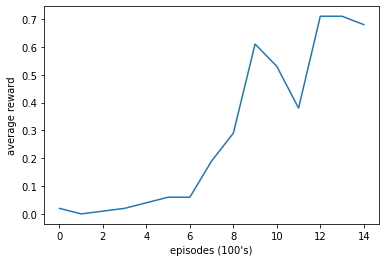

In [26]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()